# US Car Sales Analysis Report

Objective: In this project, I will analyze customer preferences, behaviour, and market demand based on several features that influence a consumer's car choice. The goal is to derive meaningful business insights for automotive companies and a detailed market analysis to guide customers into the best car option available in different regions in the US during the period from January 2014 to July 2015. This analysis offers an in-depth look at various factors, such as model, brand, and overall value (with price profiles based on condition, mileage, and average price).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
car = pd.read_csv ('car_prices.csv')

### Understanding Data

In [5]:
car.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [6]:
car.shape

(558837, 16)

In [7]:
car.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [8]:
car.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### Exploratory Data Analysis

##### Checking Missing Values and Duplicates

In [12]:
car.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [15]:
car.duplicated().sum()

0

In [20]:
car.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

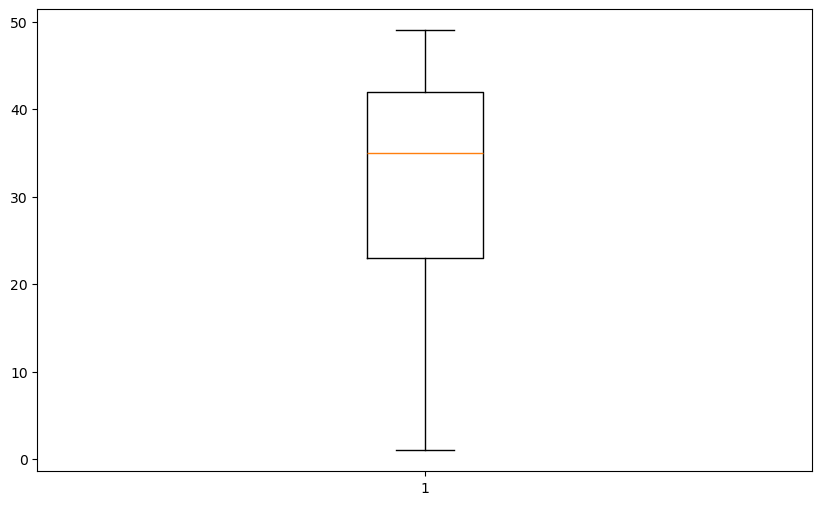

In [23]:
plt.figure(figsize=(10, 6))
plt.boxplot(car['condition'].dropna())
plt.show()

#### Data Cleaning

In [26]:
car=car.drop(['interior', 'trim', 'transmission', 'seller'], axis=1)
car.dropna(subset=['saledate'], inplace=True)

In [28]:
invalid_values = [
    '3vwd17aj4fm201708', '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
    '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475', '3vwd17aj5fm297123',
    '3vwd17aj5fm219943', '3vwd17aj9fm219766', '3vwd17aj3fm259017', '3vwd17aj5fm206111',
    '3vwd17aj5fm273601', '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
    '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938', '3vwd17aj7fm229552',
    '3vwd17aj8fm298895', '3vwd17aj4fm236636', '3vwd17aj5fm225953', '3vwd17aj7fm326640',
    '3vwd17aj8fm239622', '3vwd17aj2fm261566']

car.drop(car[car['state'].isin(invalid_values)].index, inplace=True)
car.drop(car[car['color'] == '—'].index, inplace=True)
car['body'] = car['body'].str.title()
car['make'] = car['make'].str.title()

car['body'] = car['body'].replace('Truck', 'Pickup Truck')
pickuptruck_update = ['F-150','Avalanche','F-250 Super Duty','Titan','Colorado','1500','2500','3500','Silverado 2500HD','Silverado 1500','Sierra 2500HD','F-350 Super Duty','Sonoma','Mark LT','Frontier','Equator','Baja','Ridgeline','H2 SUT','Sierra 1500','Silverado 1500 Classic','Ram Pickup 2500','Explorer Sport Trac','Silverado 2500HD Classic','Silverado 3500 Classic','Silverado 3500','Sierra 3500HD','Dakota','F-450 Super Duty','Escalade EXT','S-10','Canyon','Sierra 1500 Classic','Black Diamond Avalanche','Silverado 1500 Hybrid','Ram Pickup 1500','Ram Pickup 3500','Silverado 1500HD','C/K 3500 Series','H3T','Sierra 1500HD','Sierra 3500','Sierra 1500 Hybrid','Ranger','Tundra','Raider','Tacoma','F-150 Super Duty','Truck','B-Series','B-Series Truck']  
pickuptruck_correction = car.loc[car['model'].isin(pickuptruck_update), 'body'] = 'Pickup Truck'
coupe_update = ['Forte','Q60 Coupe','G Coupe','CTS Coupe','Genesis Coupe','Elantra Coupe','CTS-V Coupe','G37 Coupe']
coupe_correction = car.loc[car['model'].isin(coupe_update), 'body'] = 'Coupe'
sedan_update = ['G Sedan']
sedan_correction = car.loc[car['model'].isin(sedan_update), 'body'] = 'Sedan'
convertible_update = ['Q60 Convertible','G Convertible','Q37 Convertible','Beetle Convertible','GranTurismo Convertible']
convertible_correction = car.loc[car['model'].isin(convertible_update), 'body'] = 'Convertible'
van_update = ['Promaster Cargo Van','Transit Van','E-Series Van']
van_correction = car.loc[car['model'].isin(van_update), 'body'] = 'Van'
escape_update = ['escape']
escape_correction = car.loc[car['model'].isin(escape_update), 'body'] = 'Suv'

#### Handling Missing Values (Numerical data)
Mean and Median Imputation

Median imputation was chosen to handle missing values in the 'odometer,' 'mmr,' and 'sellingprice' columns due to the high number of outliers. In contrast, mean imputation was applied to the 'condition' column, as it did not exhibit a significant number of outliers.

In [31]:
condition_mean = car['condition'].mean()
odometer_median = car['odometer'].median()
mmr_median = car['mmr'].median()
sellingprice_median = car['sellingprice'].median()

In [33]:
car.fillna({'condition': condition_mean}, inplace=True)
car.fillna({'odometer': odometer_median}, inplace=True)
car.fillna({'mmr': mmr_median}, inplace=True)
car.fillna({'sellingprice': sellingprice_median}, inplace=True)

#### Handling Missing Values (Categorical data)
Mode imputation

In [36]:
make_mode = car['make'].mode()[0]
model_mode = car['model'].mode()[0]
body_mode = car['body'].mode()[0]
color_mode = car['color'].mode()[0]

In [38]:
car['make'].fillna(make_mode, inplace=True)
car['model'].fillna(model_mode, inplace=True)
car['body'].fillna(body_mode, inplace=True)
car['color'].fillna(color_mode, inplace=True)

Converting 'Saledate' into datetime type

In [41]:
car['saledate'] = car['saledate'].apply(lambda x: ' '.join(x.split()[1:4]))
car['saledate'] = pd.to_datetime(car['saledate'], errors='coerce')
car = car.sort_values(by='saledate')

Extracting year, month and day from 'Saledate'

In [44]:
car["saleyear"] = car["saledate"].dt.year
car["month"] = car["saledate"].dt.month
car["day"] = car["saledate"].dt.day

#### Checking handling missing values results and types

In [47]:
car.dtypes

year                     int64
make                    object
model                   object
body                    object
vin                     object
state                   object
condition              float64
odometer               float64
color                   object
mmr                    float64
sellingprice           float64
saledate        datetime64[ns]
saleyear                 int32
month                    int32
day                      int32
dtype: object

In [57]:
car.head(10)

,year,make,model,body,vin,state,condition,odometer,color,mmr,sellingprice,saledate,saleyear,month,day
28837,2000,Jeep,wrangler,Sedan,1j4fa29p0yp701279,sc,19.0,161099.0,black,5025.0,4000.0,2014-01-01,2014,1,1
72009,2006,Chevrolet,Avalanche,Pickup Truck,3gnec12z96g177687,sc,21.0,99247.0,black,7500.0,6800.0,2014-01-01,2014,1,1
69527,2013,Ford,Mustang,Convertible,1zvbp8em2d5239487,sc,36.0,60259.0,white,11600.0,13300.0,2014-01-01,2014,1,1
43930,2010,Acura,TSX,Sedan,jh4cu4f68ac000198,sc,38.0,76360.0,gray,13300.0,14800.0,2014-01-01,2014,1,1
71689,2007,Cadillac,DTS,Sedan,1g6kd57y07u127195,sc,34.0,106426.0,beige,6250.0,7100.0,2014-01-01,2014,1,1
30632,2014,Toyota,Camry,Sedan,4t1bf1fk3eu327266,sc,3.0,33959.0,gray,16450.0,14800.0,2014-01-01,2014,1,1
20366,2006,Ford,F-150,Pickup Truck,1ftrf02w96kb52203,sc,35.0,100359.0,gray,6375.0,8300.0,2014-01-01,2014,1,1
66392,2014,Chrysler,Town and Country,Minivan,2c4rc1bg9er131861,sc,2.0,28905.0,white,18450.0,13600.0,2014-01-01,2014,1,1
69165,2014,Volkswagen,Passat,Sedan,1vwat7a32ec058742,sc,2.0,21680.0,burgundy,13650.0,11500.0,2014-01-01,2014,1,1
54913,2011,Mini,Cooper,Hatchback,wmwsv3c50bty20273,sc,44.0,74534.0,gray,10650.0,10700.0,2014-01-01,2014,1,1


In [59]:
car.tail()

,year,make,model,body,vin,state,condition,odometer,color,mmr,sellingprice,saledate,saleyear,month,day
558788,2014,Chevrolet,Silverado 1500,Pickup Truck,3gcukrec4eg454516,pa,49.0,26294.0,red,30700.0,29000.0,2015-07-14,2015,7,14
539285,2011,Toyota,Tundra,Pickup Truck,5tfrm5f11bx028781,tx,38.0,89732.0,green,15200.0,13250.0,2015-07-14,2015,7,14
488876,2013,Ram,1500,Pickup Truck,3c6jr6at6dg556750,ms,36.0,29861.0,white,18450.0,15000.0,2015-07-14,2015,7,14
452474,2014,Toyota,Tundra,Pickup Truck,5tfum5f12ex057057,fl,45.0,18208.0,white,26500.0,25600.0,2015-07-14,2015,7,14
200268,2007,Chevrolet,Tahoe,Suv,1gnfc13007r166874,fl,23.0,1.0,white,10450.0,9100.0,2015-07-21,2015,7,21


In [60]:
car.isnull().sum()

year            0
make            0
model           0
body            0
vin             0
state           0
condition       0
odometer        0
color           0
mmr             0
sellingprice    0
saledate        0
saleyear        0
month           0
day             0
dtype: int64

In [62]:
car.dtypes

year                     int64
make                    object
model                   object
body                    object
vin                     object
state                   object
condition              float64
odometer               float64
color                   object
mmr                    float64
sellingprice           float64
saledate        datetime64[ns]
saleyear                 int32
month                    int32
day                      int32
dtype: object

## Initial Analysis Report
### Top 10 by feature

First, I uncovered the top 10 values for the dataset's most important features across the entire country, which I then examined and compared to the regions analyzed later.

In [66]:
top10model = car['model'].value_counts().head(10)
top10make = car['make'].value_counts().head(10)
top10body = car['body'].value_counts().head(10)
top10color = car['color'].value_counts().head(10)

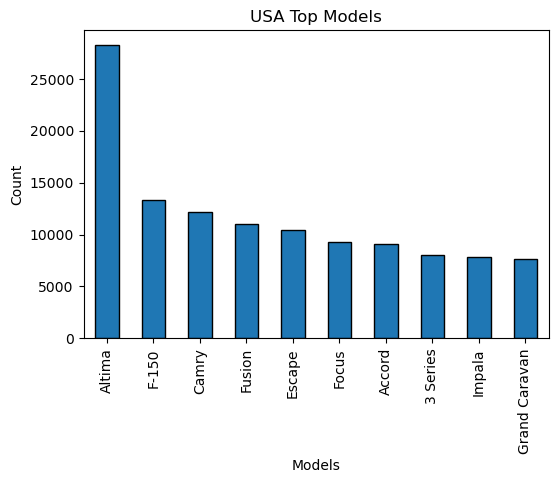

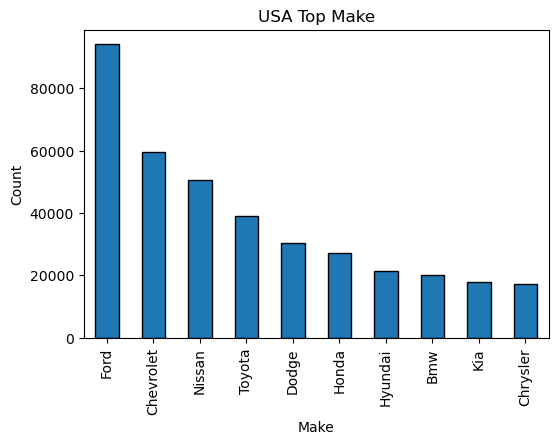

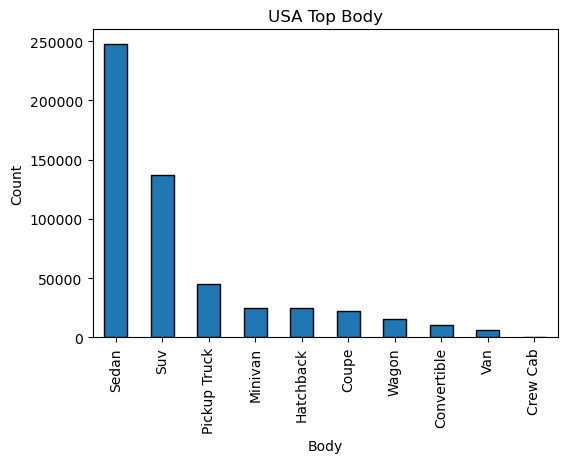

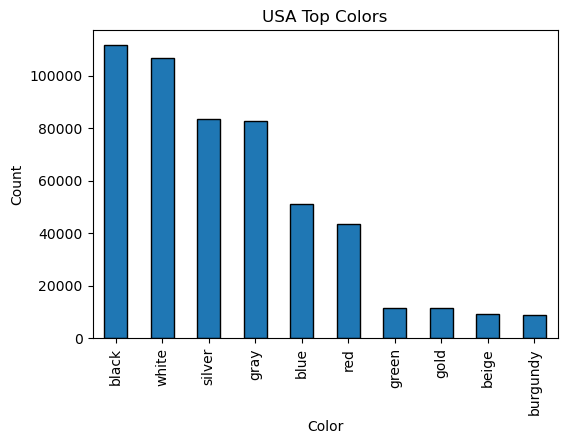

In [68]:
plt.figure(figsize=(6, 4))
top10model.plot(kind='bar', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Count')
plt.title('USA Top Models')
plt.show()

plt.figure(figsize=(6, 4))
top10make.plot(kind='bar', edgecolor='black')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('USA Top Make')
plt.show()

plt.figure(figsize=(6, 4))
top10body.plot(kind='bar', edgecolor='black')
plt.xlabel('Body')
plt.ylabel('Count')
plt.title('USA Top Body')
plt.show()

plt.figure(figsize=(6, 4))
top10color.plot(kind='bar', edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('USA Top Colors')
plt.show()

Based on the overall view of the country, we can state that consumer preferences are: the Altima as the top model, Ford as the leading brand, Sedan as the preferred body type and Black as the most popular color, making these the country's top choices in each category. This conclusion is supported not only by the top body type bar chart, which highlights the Sedan as the most chosen car type among Americans, but also by the fact that six of the top ten models are Sedans, with the remaining four distributed across other types.

Moreover, Ford stands out as the top choice in the brand category, holding a significant lead, followed by Chevrolet, Nissan, Toyota, and Dodge, completing the top five. Regarding body types, the Sedan remains the clear favorite, followed by SUVs as the second preference, with Pickup Trucks, Minivans, and Hatchbacks rounding out the top five. Neutral tones dominate the color rankings, with Black, White, Silver, and Gray taking the lead. Blue secures the fifth spot, standing out as the top choice among vibrant colors.

## Analyzing Customer Preferences and Market Demand by Region

I built variables to filter the data by region in order to examine customer preferences and consequently, market demands for the automotive sector throughout the five regions of the United States.

In [73]:
west = car[car['state'].isin(['fl', 'wa', 'or', 'nv', 'ca', 'ut', 'co', 'hi'])]
midwest = car[car['state'].isin(['md', 'sd', 'ne', 'mo', 'ia', 'mn', 'wi', 'il', 'in', 'mi', 'oh'])]
southwest = car[car['state'].isin(['az', 'nm', 'tx', 'ok'])]
northeast = car[car['state'].isin(['pa', 'ny', 'nj', 'vt', 'ma', 'md'])]
southeast = car[car['state'].isin(['la', 'ms', 'al', 'tn', 'wv', 'ga', 'fl', 'sc', 'nc', 'va'])]

top_10_models_west = west['model'].value_counts().head(10)
top_10_models_midwest = midwest['model'].value_counts().head(10)
top_10_models_southwest = southwest['model'].value_counts().head(10)
top_10_models_northeast = northeast['model'].value_counts().head(10)
top_10_models_southeast = southeast['model'].value_counts().head(10)

top_10_make_west = west['make'].value_counts().head(10)
top_10_make_midwest = midwest['make'].value_counts().head(10)
top_10_make_southwest = southwest['make'].value_counts().head(10)
top_10_make_northeast = northeast['make'].value_counts().head(10)
top_10_make_southeast = southeast['make'].value_counts().head(10)

top_10_body_west = west['body'].value_counts().head(10)
top_10_body_midwest = midwest['body'].value_counts().head(10)
top_10_body_southwest = southwest['body'].value_counts().head(10)
top_10_body_northeast = northeast['body'].value_counts().head(10)
top_10_body_southeast = southeast['body'].value_counts().head(10)

top_10_color_west = west['color'].value_counts().head(10)
top_10_color_midwest = midwest['color'].value_counts().head(10)
top_10_color_southwest = southwest['color'].value_counts().head(10)
top_10_color_northeast = northeast['color'].value_counts().head(10)
top_10_color_southeast = southeast['color'].value_counts().head(10)

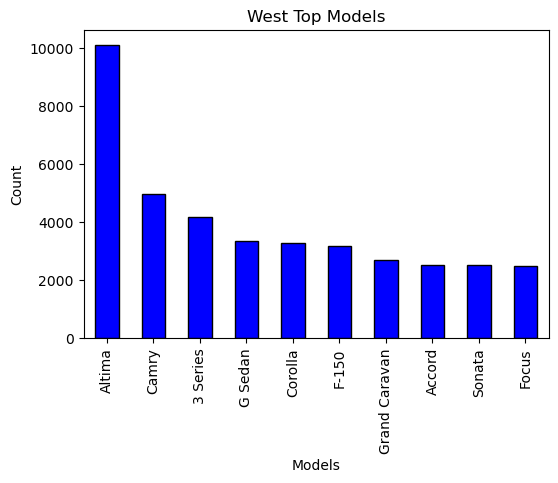

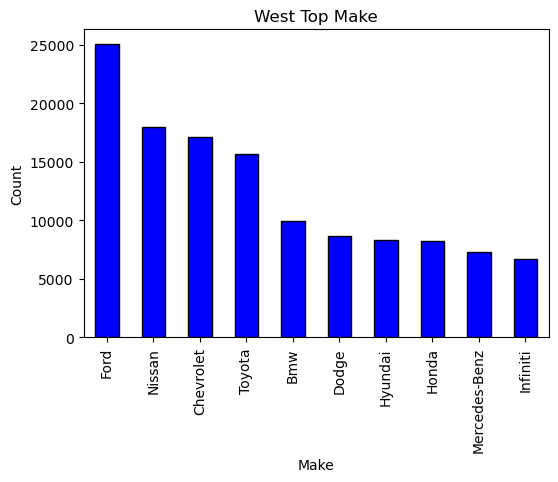

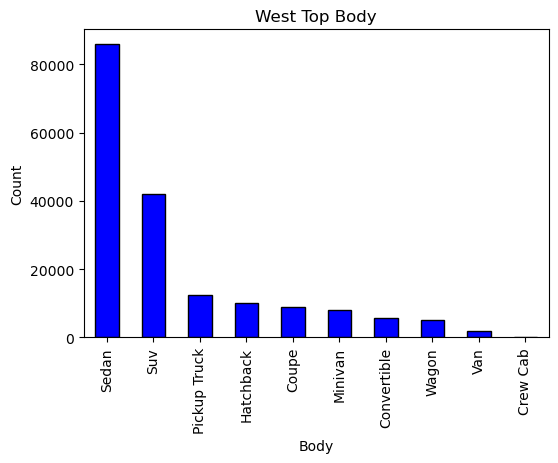

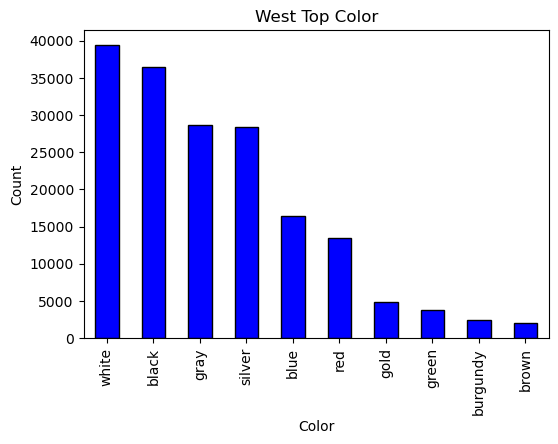

In [74]:
plt.figure(figsize=(6, 4))
top_10_models_west.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Count')
plt.title('West Top Models')
plt.show()

plt.figure(figsize=(6, 4))
top_10_make_west.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('West Top Make')
plt.show()

plt.figure(figsize=(6, 4))
top_10_body_west.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Body')
plt.ylabel('Count')
plt.title('West Top Body')
plt.show()

plt.figure(figsize=(6, 4))
top_10_color_west.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('West Top Color')
plt.show()

Regarding the western region, we can highlight the strength of Sedan cars, just as in the rest of the country, with the top five vehicles belonging to this category. In terms of brands, BMW appears in the region's top five, while Ford remains as the strongest reference and being the only region with a standout model, Infiniti has the G Sedan as the fourth most purchased model in the West region and ranks tenth overall (the only region where it appears in the rankings). As for car types, Coupes makes it into the top five, mainly due to BMW's preference. The color preferences are quite similar to the national trend, except for White being the top choice, surpassing Black as the number one color.

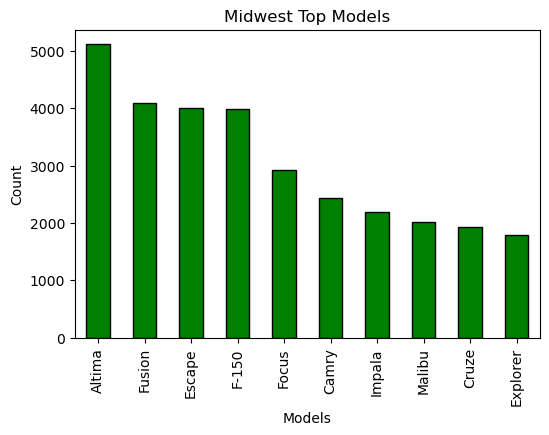

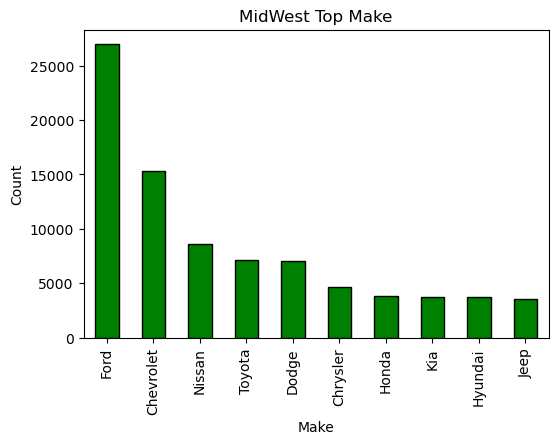

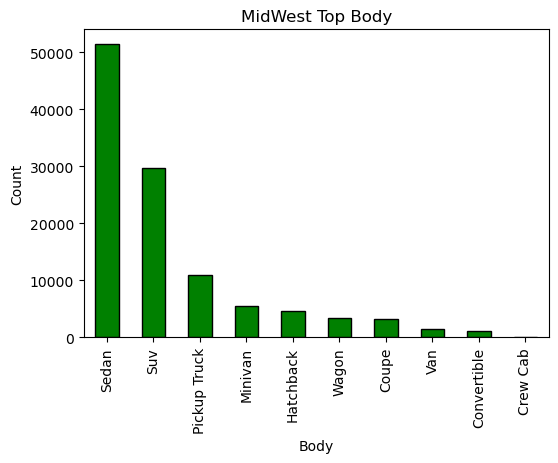

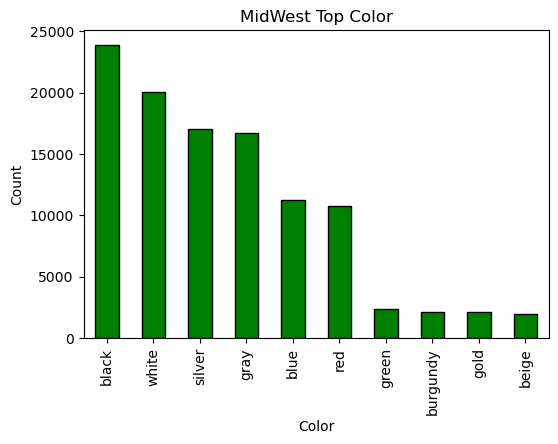

In [77]:
plt.figure(figsize=(6, 4))
top_10_models_midwest.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Count')
plt.title('Midwest Top Models')
plt.show()

plt.figure(figsize=(6, 4))
top_10_make_midwest.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('MidWest Top Make')
plt.show()

plt.figure(figsize=(6, 4))
top_10_body_midwest.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Body')
plt.ylabel('Count')
plt.title('MidWest Top Body')
plt.show()

plt.figure(figsize=(6, 4))
top_10_color_midwest.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('MidWest Top Color')
plt.show()

In the Midwest region, the preference for Sedans is also notable in this region, with seven sedan models among the top ten, as well as the strength of SUVs, which represent the second-highest number of models. Regarding brands and colors, the distribution aligns exactly with the national trend.

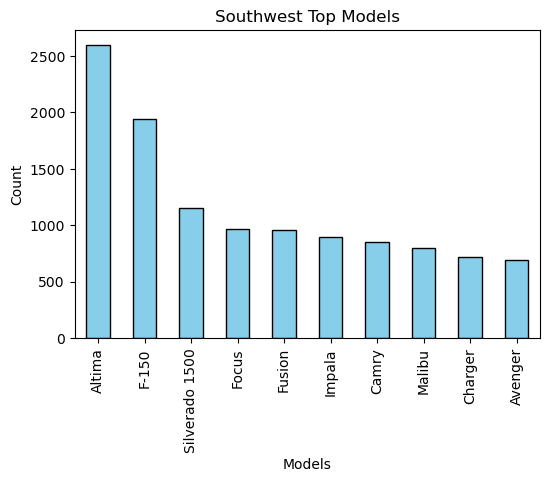

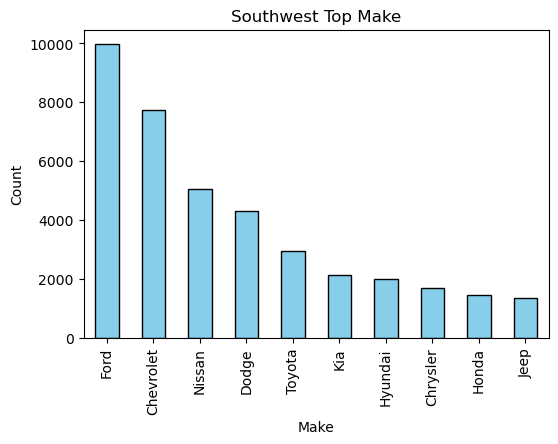

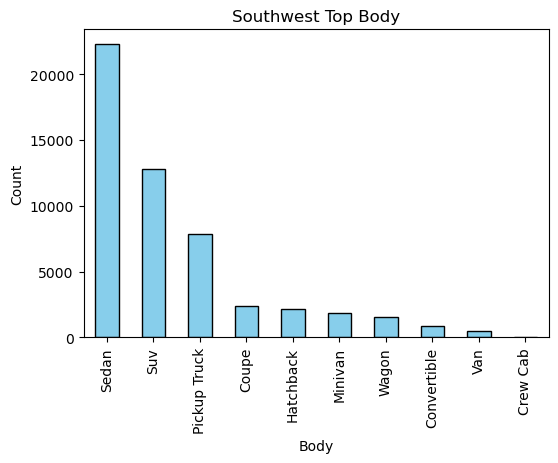

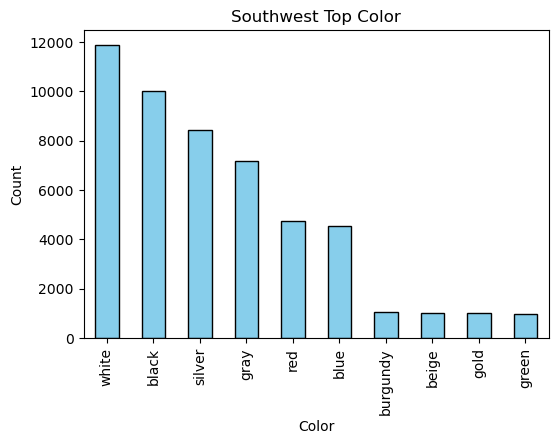

In [80]:
plt.figure(figsize=(6, 4))
top_10_models_southwest.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Count')
plt.title('Southwest Top Models')
plt.show()

plt.figure(figsize=(6, 4))
top_10_make_southwest.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Southwest Top Make')
plt.show()

plt.figure(figsize=(6, 4))
top_10_body_southwest.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Body')
plt.ylabel('Count')
plt.title('Southwest Top Body')
plt.show()

plt.figure(figsize=(6, 4))
top_10_color_southwest.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Southwest Top Color')
plt.show()

In the Southwest region, the high number of F-150 and Silverado 1500 models, ranked second and third respectively, highlights the strength of pickup trucks in this area. Additionally, the absence of BMW and Mercedes in the rankings is noticeable, indicating that this region is a weaker market for both brands.

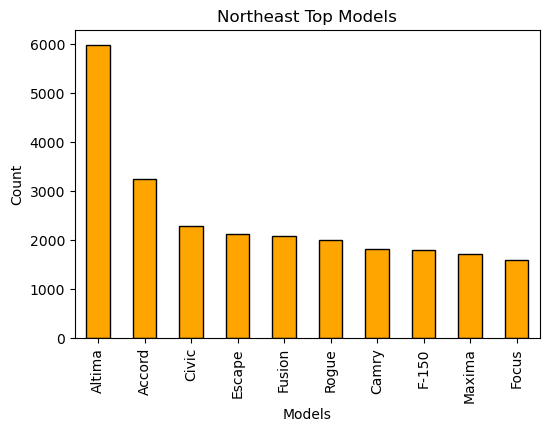

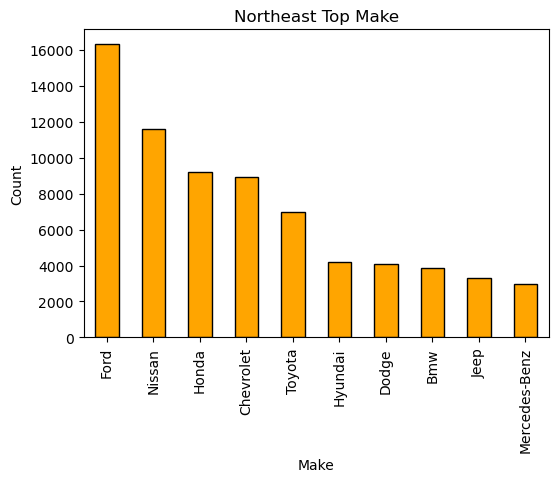

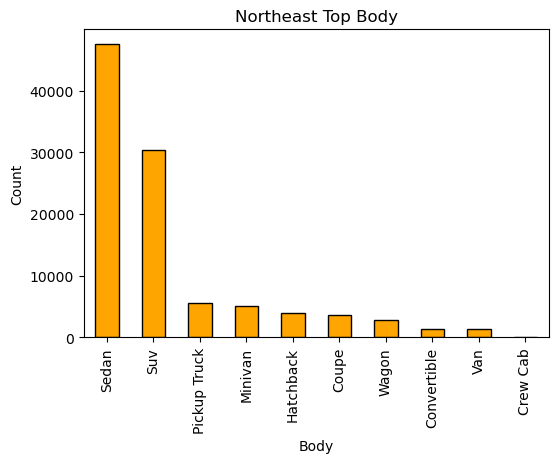

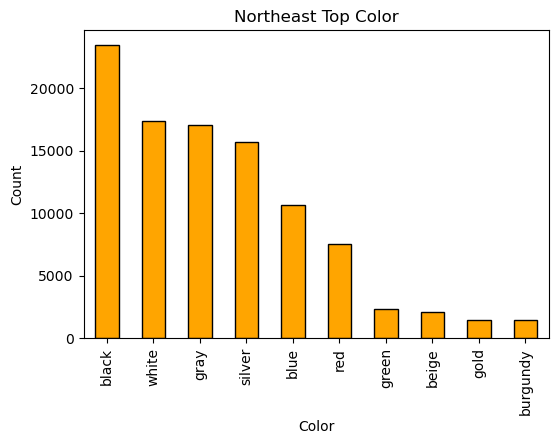

In [83]:
plt.figure(figsize=(6, 4))
top_10_models_northeast.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Count')
plt.title('Northeast Top Models')
plt.show()

plt.figure(figsize=(6, 4))
top_10_make_northeast.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Northeast Top Make')
plt.show()

plt.figure(figsize=(6, 4))
top_10_body_northeast.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Body')
plt.ylabel('Count')
plt.title('Northeast Top Body')
plt.show()

plt.figure(figsize=(6, 4))
top_10_color_northeast.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Northeast Top Color')
plt.show()

Regarding Northeast, The predominance of sedans is also reflected in the region's models, with the Escape and Rogue standing out in the top 10, representing SUVs. Honda achieves its best performance in the country in this region, ranking third. In contrast, Dodge has its worst performance, although it still holds seventh place, while Chrysler once again falls outside the top 10.

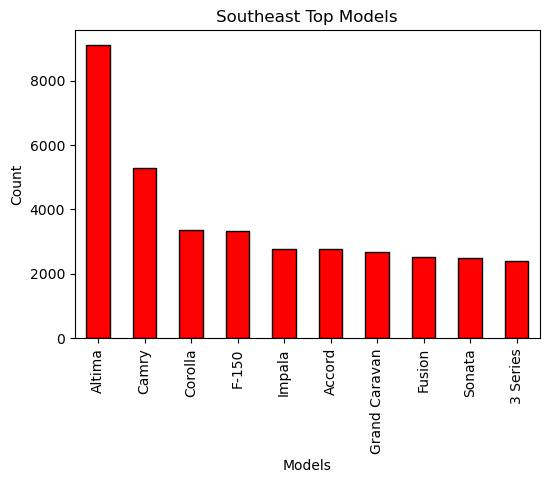

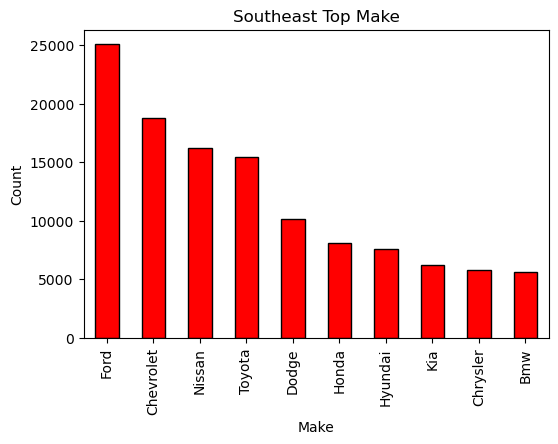

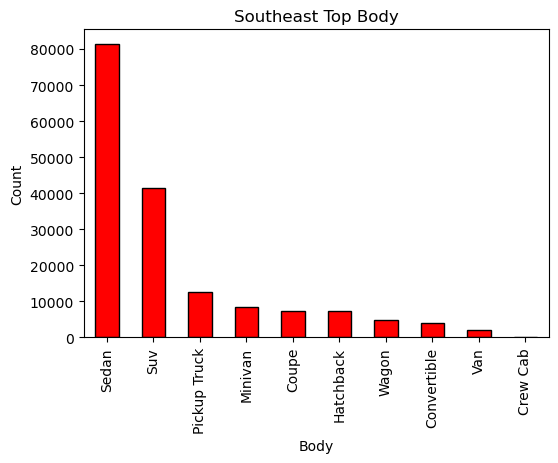

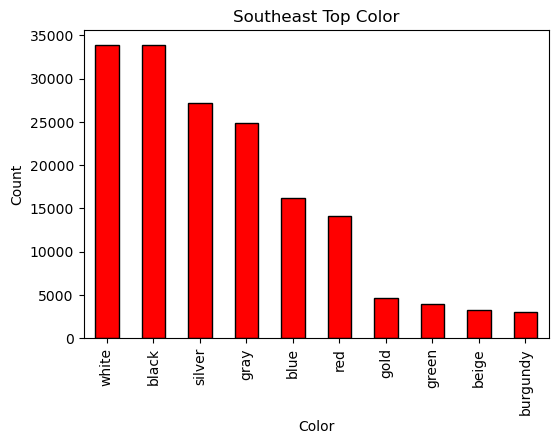

In [86]:
plt.figure(figsize=(6, 4))
top_10_models_southeast.plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Count')
plt.title('Southeast Top Models')
plt.show()

plt.figure(figsize=(6, 4))
top_10_make_southeast.plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Southeast Top Make')
plt.show()

plt.figure(figsize=(6, 4))
top_10_body_southeast.plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Body')
plt.ylabel('Count')
plt.title('Southeast Top Body')
plt.show()

plt.figure(figsize=(6, 4))
top_10_color_southeast.plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Southeast Top Color')
plt.show()

In the Southeast region, Among the models, sedans dominate much of the top 10. Interestingly, the Grand Caravan appears in seventh place, with the Southeast and West regions being the only ones where this model ranks, coincidentally in the same position. It is also worth noting the absence of Jeep and Mercedes in this region.

#### Average Selling Price by State

In [90]:
avg_sellingprice_color_west = west['sellingprice'].mean()
avg_sellingprice_color_midwest = midwest['sellingprice'].mean()
avg_sellingprice_color_southwest = southwest['sellingprice'].mean()
avg_sellingprice_color_northeast = northeast['sellingprice'].mean()
avg_sellingprice_southeast = southeast['sellingprice'].mean()

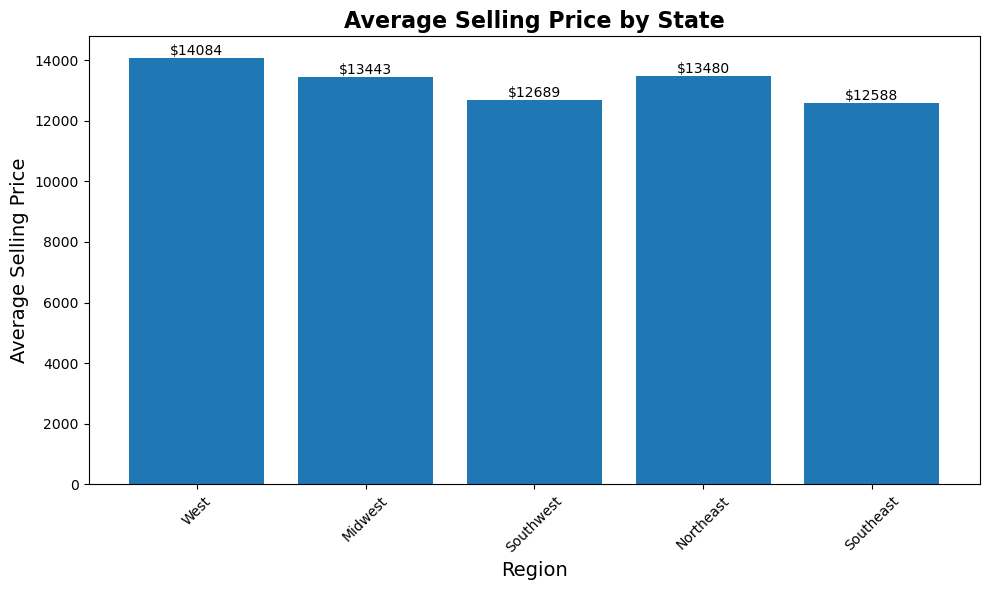

In [91]:
region_prices = {
    'West': west['sellingprice'].mean(),
    'Midwest': midwest['sellingprice'].mean(),
    'Southwest': southwest['sellingprice'].mean(),
    'Northeast': northeast['sellingprice'].mean(),
    'Southeast': southeast['sellingprice'].mean()
}

plt.figure(figsize=(10, 6))
graph = plt.bar(region_prices.keys(), region_prices.values())
plt.title('Average Selling Price by State', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

for bar in graph:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:.0f}', ha='center', va='bottom')

plt.show()

Analyzing the average selling price by region, we observe relatively close averages across all regions. The West region stands out with a slightly higher average, followed by the Midwest and Northeast regions, which have very similar averages and rank as the second highest. Lastly, the Southwest and Southeast regions also show closely aligned averages, placing them at the lower end of all.

## Market Analysis

In this part of the report, I'll analyze the seasonal trends of the 5 main regions of US, throughout the amount of sales, the price variation and categorizing price profiles based on several features in order to contribute with relevant information for consumers to have a better overview of what the automotive market has to offer.

##### Sales by Month

In [99]:
west_sales_month = west.groupby('month').size()
west_sales_month

month
1     42739
2     53935
3     14918
4       341
5     16073
6     31165
7       427
12    20865
dtype: int64

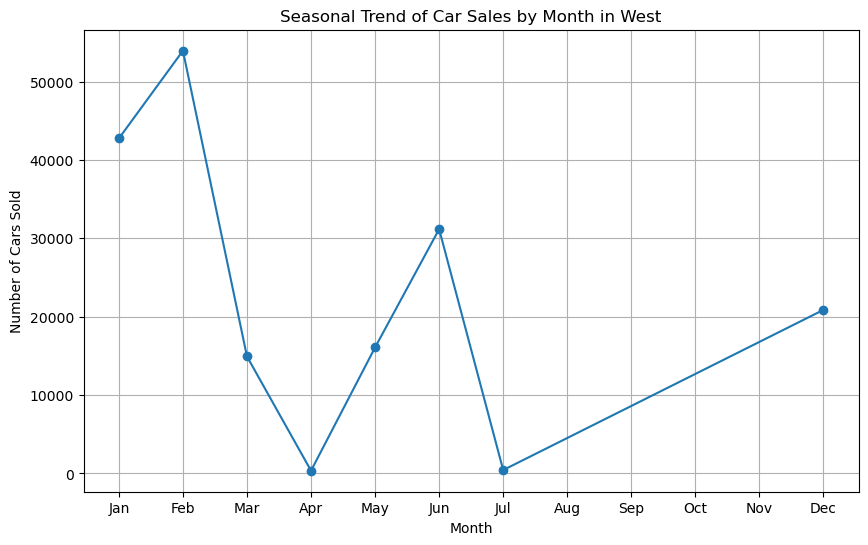

In [101]:
plt.figure(figsize=(10, 6))
west_sales_month.plot(kind='line', marker='o')
plt.title('Seasonal Trend of Car Sales by Month in West')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [103]:
midwest_sales_month = midwest.groupby('month').size()
midwest_sales_month

month
1     28511
2     31837
3      9699
4       287
5      9376
6     20718
7       199
12    10695
dtype: int64

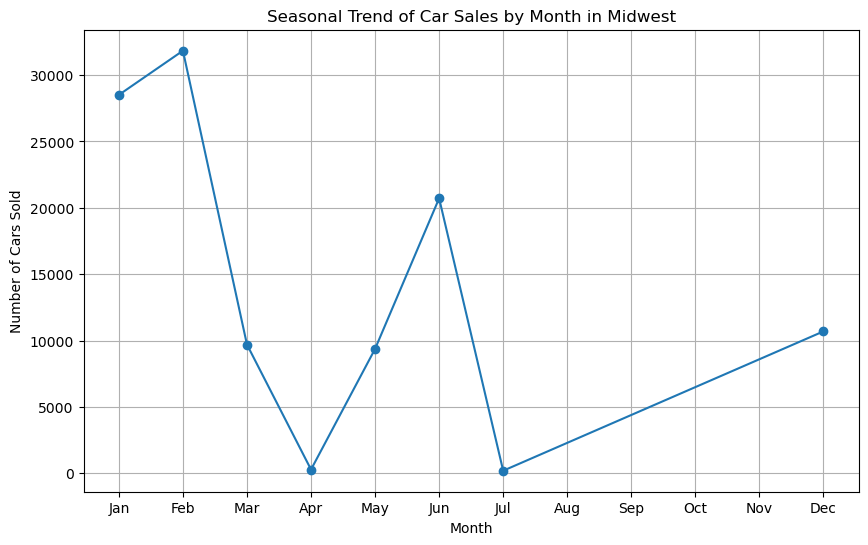

In [105]:
plt.figure(figsize=(10, 6))
midwest_sales_month.plot(kind='line', marker='o')
plt.title('Seasonal Trend of Car Sales by Month in Midwest')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [106]:
southwest_sales_month = southwest.groupby('month').size()
southwest_sales_month

month
1     12713
2     15058
3      3609
4       159
5      5808
6      9480
7       136
12     5367
dtype: int64

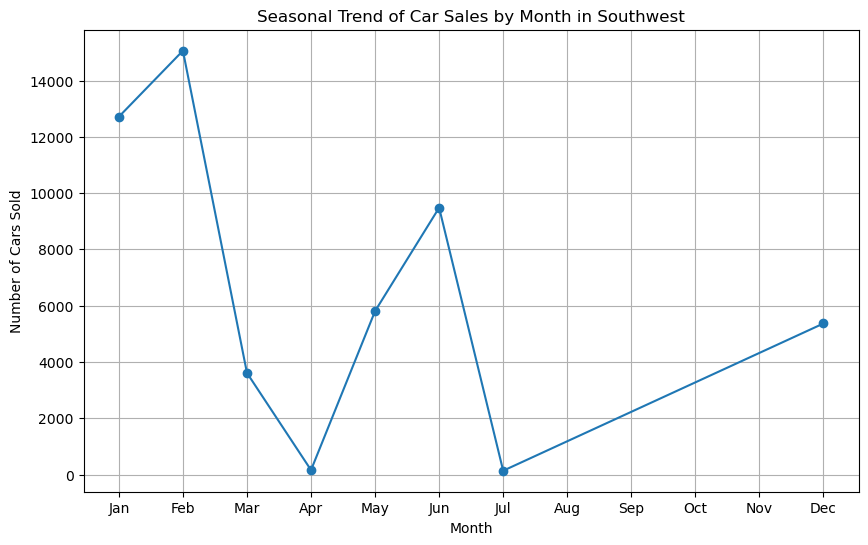

In [109]:
plt.figure(figsize=(10, 6))
southwest_sales_month.plot(kind='line', marker='o')
plt.title('Seasonal Trend of Car Sales by Month in Southwest')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [110]:
northeast_sales_month = northeast.groupby('month').size()
northeast_sales_month

month
1     26723
2     28646
3      8015
4       405
5     10633
6     19937
7       251
12     7090
dtype: int64

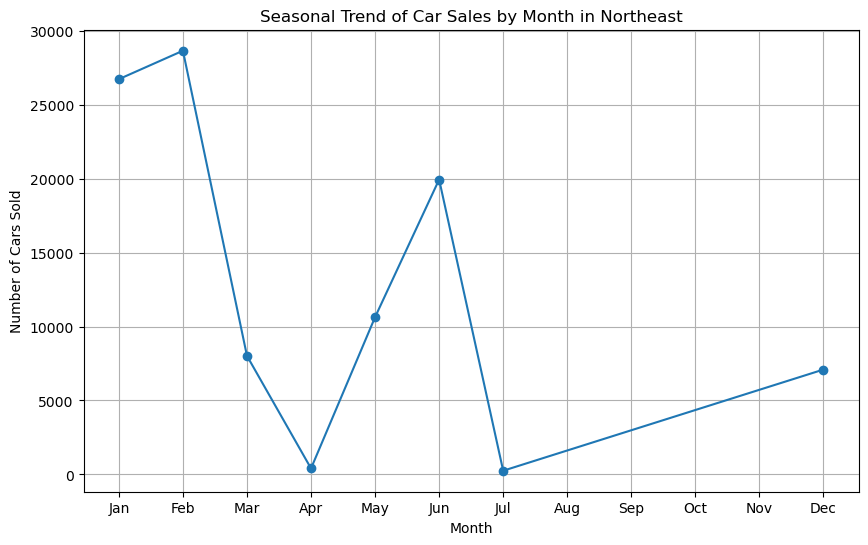

In [113]:
plt.figure(figsize=(10, 6))
northeast_sales_month.plot(kind='line', marker='o')
plt.title('Seasonal Trend of Car Sales by Month in Northeast')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [115]:
southeast_sales_month = southeast.groupby('month').size()
southeast_sales_month

month
1     41735
2     50550
3     17089
4       340
5     14567
6     29968
7       414
12    14712
dtype: int64

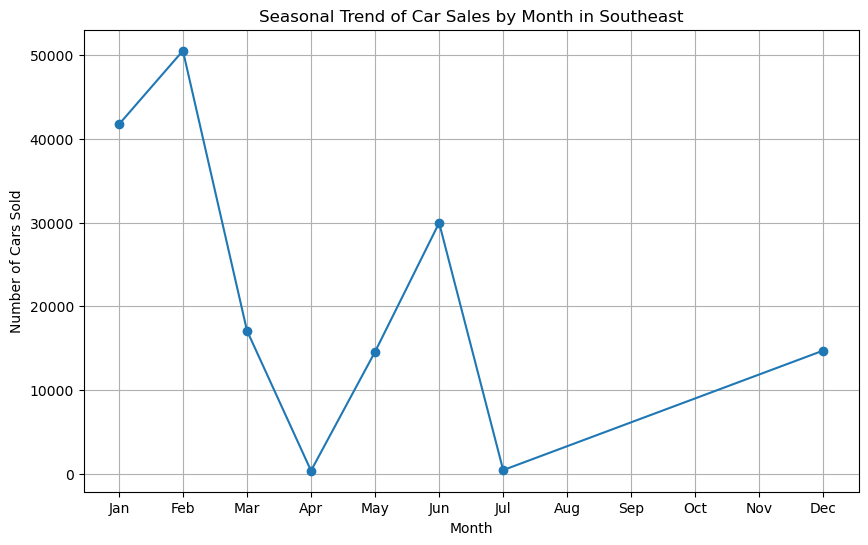

In [117]:
plt.figure(figsize=(10, 6))
southeast_sales_month.plot(kind='line', marker='o')
plt.title('Seasonal Trend of Car Sales by Month in Southeast')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

#### Average Selling Price by Month

In [120]:
west_avgprice_month = west.groupby('month')['sellingprice'].mean()
west_avgprice_month

month
1     13587.429023
2     14060.911968
3     14423.389060
4     11339.750733
5     14196.959560
6     15925.749912
7     18325.550351
12    12036.086748
Name: sellingprice, dtype: float64

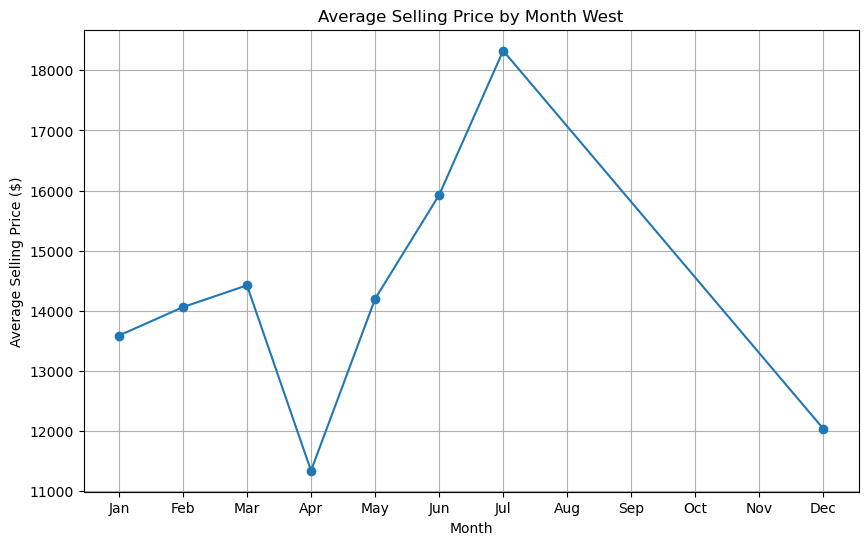

In [122]:
plt.figure(figsize=(10, 6))
west_avgprice_month.plot(kind='line', marker='o')
plt.title('Average Selling Price by Month West')
plt.xlabel('Month')
plt.ylabel('Average Selling Price ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

There is a certain pattern in the average sales price across most of the analyzed regions. In the West, for example, we observe an increase during the first three months of the year, followed by a slight drop in May and a significant rise in the average price up to July. Afterward, there is a considerable decline until the end of the year, with prices falling below the value recorded in January.

In [125]:
midwest_avgprice_month = midwest.groupby('month')['sellingprice'].mean()
midwest_avgprice_month

month
1     13147.350777
2     13378.711876
3     13221.482421
4     11636.498258
5     14206.626920
6     15202.154600
7     16734.673367
12    10528.964189
Name: sellingprice, dtype: float64

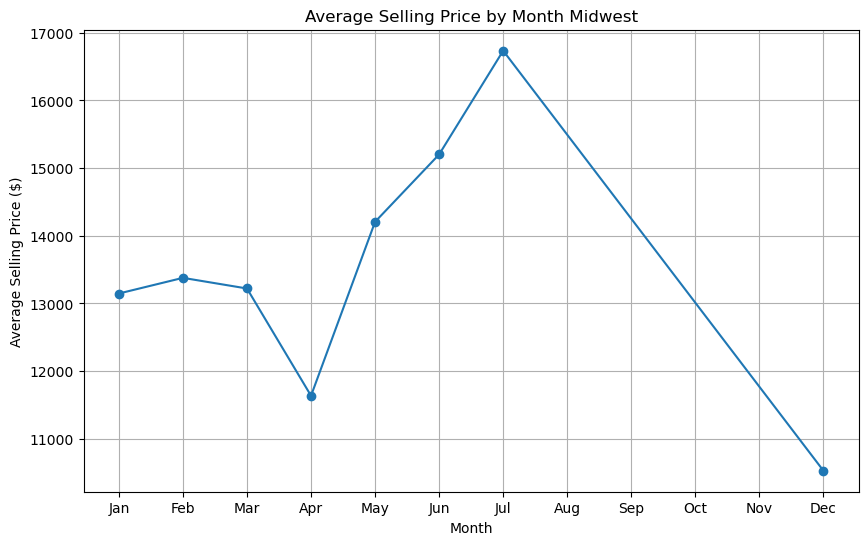

In [127]:
plt.figure(figsize=(10, 6))
midwest_avgprice_month.plot(kind='line', marker='o')
plt.title('Average Selling Price by Month Midwest')
plt.xlabel('Month')
plt.ylabel('Average Selling Price ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

For the Midwest, the pattern remains consistent; however, there is a slight drop in March. Despite this, the average price increases again from May to July before declining until December, as previously mentioned.

In [130]:
southwest_avgprice_month = southwest.groupby('month')['sellingprice'].mean()
southwest_avgprice_month

month
1     12219.269173
2     13125.168548
3     12706.325852
4      8403.459119
5     13032.647211
6     13811.115717
7     15376.860294
12    10270.234582
Name: sellingprice, dtype: float64

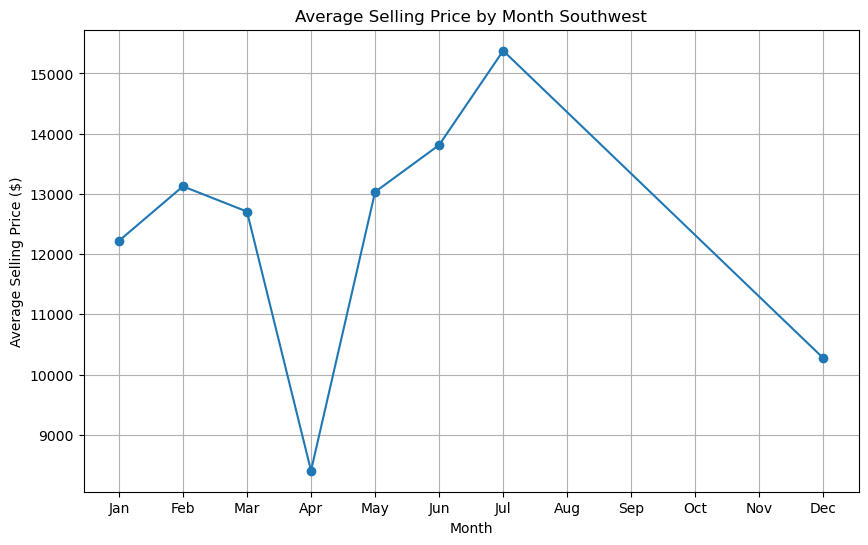

In [132]:
plt.figure(figsize=(10, 6))
southwest_avgprice_month.plot(kind='line', marker='o')
plt.title('Average Selling Price by Month Southwest')
plt.xlabel('Month')
plt.ylabel('Average Selling Price ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

We can observe that the pattern here is quite similar to the Midwest region, with a drop in March and the same variation for the rest of the year, showing an increase in the middle of the year and a significant decline toward the end of the year.

In [135]:
northeast_avgprice_month = northeast.groupby('month')['sellingprice'].mean()
northeast_avgprice_month

month
1     13224.509000
2     13214.688822
3     12183.196881
4      8529.876543
5     14938.887238
6     14837.907258
7     16012.749004
12    11160.533850
Name: sellingprice, dtype: float64

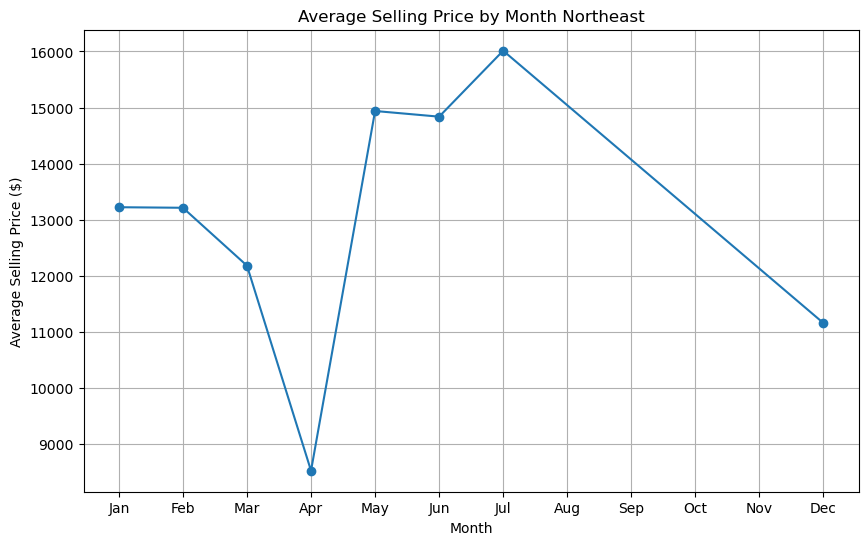

In [137]:
plt.figure(figsize=(10, 6))
northeast_avgprice_month.plot(kind='line', marker='o')
plt.title('Average Selling Price by Month Northeast')
plt.xlabel('Month')
plt.ylabel('Average Selling Price ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

There is a slight difference in the Northeast region. The average remains steady in February, drops in March, and then increases, following the established pattern. However, there is a slight dip in June before rising again in July, followed by a significant decline toward the end of the year.

In [140]:
southeast_avgprice_month = southeast.groupby('month')['sellingprice'].mean()
southeast_avgprice_month

month
1     12065.122248
2     12654.942908
3     13185.694131
4      8594.558824
5     13059.415391
6     13787.158202
7     17128.891304
12    10196.815661
Name: sellingprice, dtype: float64

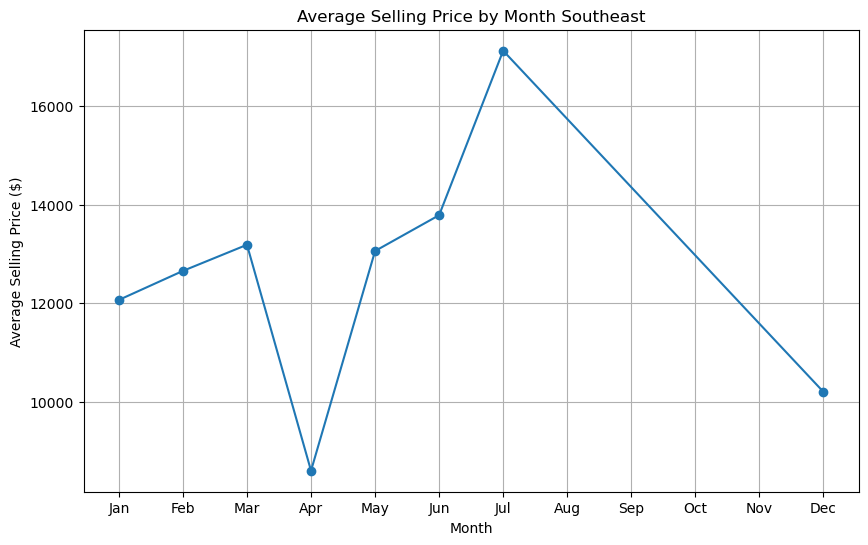

In [142]:
plt.figure(figsize=(10, 6))
southeast_avgprice_month.plot(kind='line', marker='o')
plt.title('Average Selling Price by Month Southeast')
plt.xlabel('Month')
plt.ylabel('Average Selling Price ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

Finally, the Southeast region closely mirrors the pattern, with growth in the early months, a significant increase from May to July, and a decline, as seen in all regions, toward the end of the year.

### Price Profile by Region

Created based on the condition rank, odometer rank and average price. In order to guide customer to search the best car considering these features ranked into a single price profile and their budget for all regions. 

In [188]:
west.loc[:, 'condition_rank'] = pd.cut(west['condition'],
                                bins=[0, 33, 40, west['condition'].max()],
                                labels=['Bad', 'Medium', 'Good'])

In [189]:
west.loc[:,'odometer_rank'] = pd.cut(west['odometer'],
                               bins=[0, 52257.0, 99105.5, west['odometer'].max()],
                               labels=['Low', 'Medium', 'High'])

In [192]:
price_profiles_west = west.groupby(['condition_rank', 'odometer_rank'], observed=True)[['sellingprice']].mean().sort_values(['sellingprice'], ascending=[False]).reset_index()
price_profiles_west.rename(columns={'sellingprice': 'average_price'}, inplace=True)
price_profiles_west

,condition_rank,odometer_rank,average_price
0,Good,Low,21702.198051
1,Medium,Low,18574.222790
2,Bad,Low,16936.012820
3,Good,Medium,15744.643864
4,Medium,Medium,13112.495320
5,Good,High,10175.858896
6,Bad,Medium,9817.637561
7,Medium,High,7567.890423
8,Bad,High,4286.269736


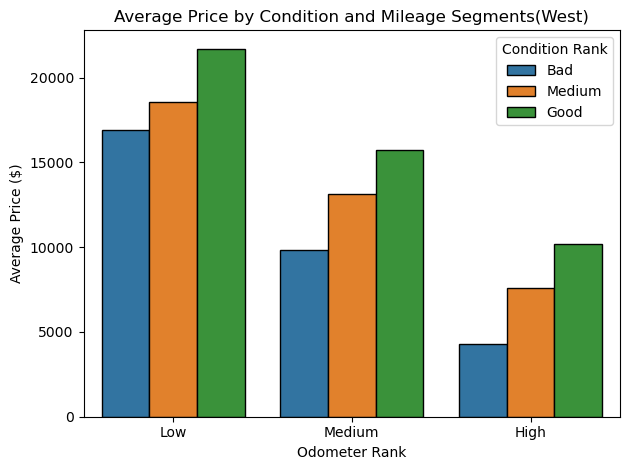

In [193]:
plt.subplot(1, 1, 1)
sns.barplot(data=price_profiles_west, x="odometer_rank", y="average_price", hue="condition_rank", edgecolor='black')
plt.title("Average Price by Condition and Mileage Segments(West)")
plt.xlabel("Odometer Rank")
plt.ylabel("Average Price ($)")
plt.legend(title="Condition Rank")

plt.tight_layout()
plt.show()

In [194]:
midwest.loc[:, 'condition_rank'] = pd.cut(midwest['condition'],
                                bins=[0, 33, 40, midwest['condition'].max()],
                                labels=['Bad', 'Medium', 'Good'])

In [198]:
midwest.loc[:,'odometer_rank'] = pd.cut(midwest['odometer'],
                               bins=[0, 52257.0, 99105.5, midwest['odometer'].max()],
                               labels=['Low', 'Medium', 'High'])

In [200]:
price_profiles_midwest = midwest.groupby(['condition_rank', 'odometer_rank'], observed=True)[['sellingprice']].mean().sort_values(['sellingprice'], ascending=[False]).reset_index()
price_profiles_midwest.rename(columns={'sellingprice': 'average_price'}, inplace=True)
price_profiles_midwest

,condition_rank,odometer_rank,average_price
0,Good,Low,19793.699858
1,Medium,Low,16912.676030
2,Bad,Low,16874.554997
3,Good,Medium,14540.291938
4,Medium,Medium,12401.625906
5,Bad,Medium,9301.108395
6,Good,High,8947.759674
7,Medium,High,7222.192726
8,Bad,High,3974.878533


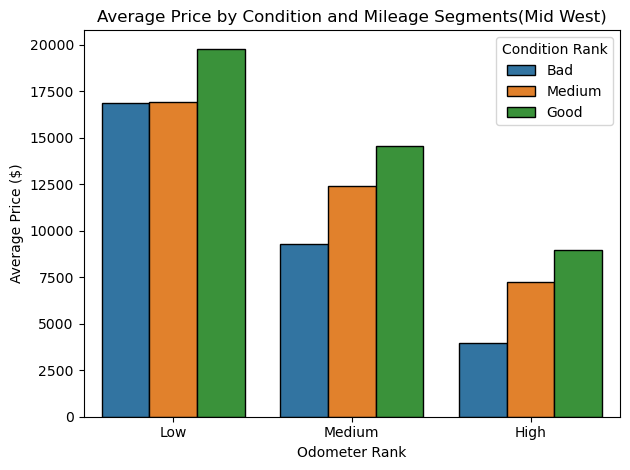

In [202]:
plt.subplot(1, 1, 1)
sns.barplot(data=price_profiles_midwest, x="odometer_rank", y="average_price", hue="condition_rank", edgecolor='black')
plt.title("Average Price by Condition and Mileage Segments(Mid West)")
plt.xlabel("Odometer Rank")
plt.ylabel("Average Price ($)")
plt.legend(title="Condition Rank")

plt.tight_layout()
plt.show()

In [204]:
southwest.loc[:, 'condition_rank'] = pd.cut(southwest['condition'],
                                bins=[0, 33, 40, southwest['condition'].max()],
                                labels=['Bad', 'Medium', 'Good'])

In [206]:
southwest.loc[:,'odometer_rank'] = pd.cut(southwest['odometer'],
                               bins=[0, 52257.0, 99105.5, southwest['odometer'].max()],
                               labels=['Low', 'Medium', 'High'])

In [208]:
price_profiles_southwest = southwest.groupby(['condition_rank', 'odometer_rank'], observed=True)[['sellingprice']].mean().sort_values(['sellingprice'], ascending=[False]).reset_index()
price_profiles_southwest.rename(columns={'sellingprice': 'average_price'}, inplace=True)
price_profiles_southwest

,condition_rank,odometer_rank,average_price
0,Good,Low,20222.025347
1,Medium,Low,17325.976843
2,Bad,Low,15977.461836
3,Good,Medium,15467.315630
4,Medium,Medium,12846.895781
5,Good,High,10947.213855
6,Bad,Medium,9938.280992
7,Medium,High,8694.192150
8,Bad,High,5134.918457


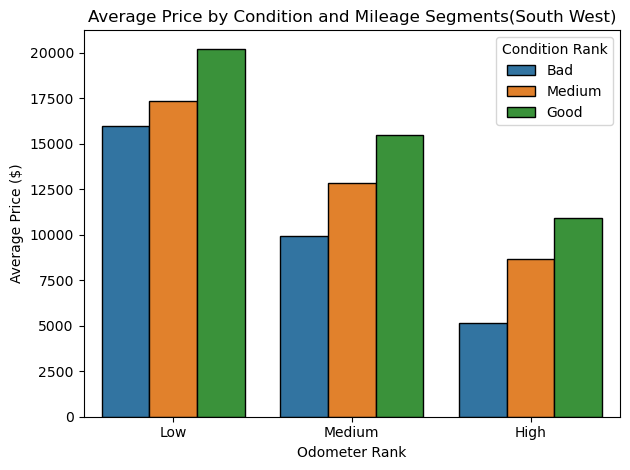

In [210]:
plt.subplot(1, 1, 1)
sns.barplot(data=price_profiles_southwest, x="odometer_rank", y="average_price", hue="condition_rank", edgecolor='black')
plt.title("Average Price by Condition and Mileage Segments(South West)")
plt.xlabel("Odometer Rank")
plt.ylabel("Average Price ($)")
plt.legend(title="Condition Rank")

plt.tight_layout()
plt.show()

In [211]:
northeast.loc[:, 'condition_rank'] = pd.cut(northeast['condition'],
                                bins=[0, 33, 40, northeast['condition'].max()],
                                labels=['Bad', 'Medium', 'Good'])

In [214]:
northeast.loc[:,'odometer_rank'] = pd.cut(northeast['odometer'],
                               bins=[0, 52257.0, 99105.5, northeast['odometer'].max()],
                               labels=['Low', 'Medium', 'High'])

In [216]:
price_profiles_northeast = northeast.groupby(['condition_rank', 'odometer_rank'], observed=True)[['sellingprice']].mean().sort_values(['sellingprice'], ascending=[False]).reset_index()
price_profiles_northeast.rename(columns={'sellingprice': 'average_price'}, inplace=True)
price_profiles_northeast

,condition_rank,odometer_rank,average_price
0,Good,Low,20941.020028
1,Medium,Low,16895.578201
2,Bad,Low,16325.544020
3,Good,Medium,15380.892946
4,Medium,Medium,12330.653559
5,Bad,Medium,9325.220719
6,Good,High,9202.958111
7,Medium,High,7209.258924
8,Bad,High,3895.750247


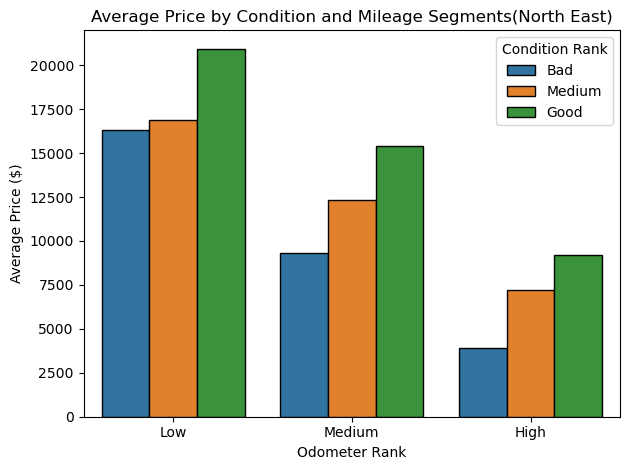

In [218]:
plt.subplot(1, 1, 1)
sns.barplot(data=price_profiles_northeast, x="odometer_rank", y="average_price", hue="condition_rank", edgecolor='black')
plt.title("Average Price by Condition and Mileage Segments(North East)")
plt.xlabel("Odometer Rank")
plt.ylabel("Average Price ($)")
plt.legend(title="Condition Rank")

plt.tight_layout()
plt.show()

In [219]:
southeast.loc[:, 'condition_rank'] = pd.cut(southeast['condition'],
                                bins=[0, 33, 40, southeast['condition'].max()],
                                labels=['Bad', 'Medium', 'Good'])

In [222]:
southeast.loc[:,'odometer_rank'] = pd.cut(southeast['odometer'],
                               bins=[0, 52257.0, 99105.5, northeast['odometer'].max()],
                               labels=['Low', 'Medium', 'High'])

In [224]:
price_profiles_southeast = southeast.groupby(['condition_rank', 'odometer_rank'], observed=True)[['sellingprice']].mean().sort_values(['sellingprice'], ascending=[False]).reset_index()
price_profiles_southeast.rename(columns={'sellingprice': 'average_price'}, inplace=True)
price_profiles_southeast

,condition_rank,odometer_rank,average_price
0,Good,Low,20614.222636
1,Medium,Low,17471.031775
2,Bad,Low,16872.038190
3,Good,Medium,14850.881657
4,Medium,Medium,12089.904706
5,Good,High,9916.463521
6,Bad,Medium,9107.277674
7,Medium,High,7294.502113
8,Bad,High,4183.388924


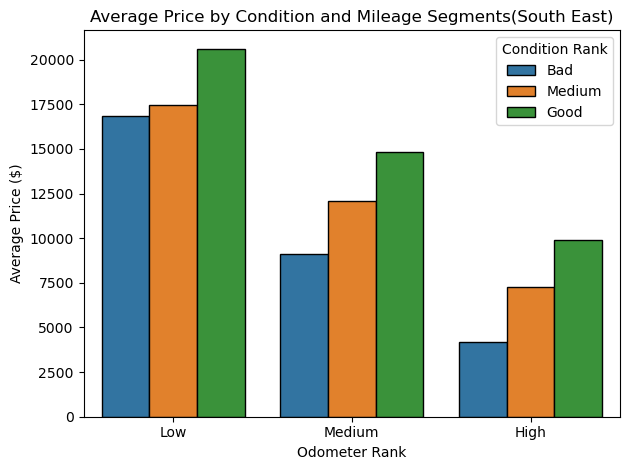

In [226]:
plt.subplot(1, 1, 1)
sns.barplot(data=price_profiles_southeast, x="odometer_rank", y="average_price", hue="condition_rank", edgecolor='black')
plt.title("Average Price by Condition and Mileage Segments(South East)")
plt.xlabel("Odometer Rank")
plt.ylabel("Average Price ($)")
plt.legend(title="Condition Rank")

plt.tight_layout()
plt.show()

## Conclusion and Recommendations

#### Customer Preferences by Region

Based on the consumer preferences analyzed above, we can observe the performance of the top 10 car brands across the five regions of the United States, along with their strengths and weaknesses in each region. While all regions share certain similarities in consumer preferences, each has unique differences. I will highlight the key factors and valuable insights by region to guide these companies toward better decision-making in their respective markets.

MIDWEST - As the region most closely aligned with the overall national results in consumer preferences, seven sedan models feature in the top 10, clearly highlighting the strong preference for sedans. Only one brand is absent from both the regional and national top 10 rankings. The presence of a minivan in fourth place among vehicle types reflects a greater preference for this category compared to other regions. Additionally, color preferences in this region align with the overall choices of the country.

SOUTHWEST - In the Southwest region, there is a noticeable preference for larger vehicles and utility models, as evidenced by the top rankings of the F-150 and Silverado 1500. However, sedans remain strongly represented, alongside a higher presence of coupes in this region, highlighted by the Charger appearing in the top 10 models. Regarding color preferences, they are largely similar to the overall national trends, with neutral colors dominating. Interestingly, this is the only region where red surpasses blue among the more vibrant color choices.


SOUTHEAST - Regarding the Southeast, The impact of sedans is also evident in this region, with seven sedans in the top 10 models. However, what stands out are the Grand Caravan and 3 Series appearing in the top 10, highlighting why minivans and coupes are among the top 5 vehicle types in this area. SUVs also have a strong presence in the region.


NORTHEAST - In the Northeast region, sedans remain strong, as they are across the country, but SUVs are also highly favored here, with the Escape and Rogue ranking well among the top models. Additionally, there is a greater preference for minivans, which stands out as a distinguishing factor for this region.

WEST - Regarding the West, Sedans, SUVs, and pickup trucks lead, as in most regions, but there is a stronger preference for hatchbacks compared to other areas. Notably, BMW ranks fifth among the top brands, with Mercedes securing ninth place. These two brands stand out for having higher market values than most of the others in the rankings.

#### Market Analysis by Region

Regarding the seasonal trend of car sales, there is also a pattern where, in all regions, the year starts with strong sales in their respective proportions, reaching a peak in February, followed by a sharp decline in March. In the middle of the year, we observe a considerable increase, though with a volume slightly exceeding half of what was achieved in the best month (February). Subsequently, there is another decline, with sales picking up slightly toward the end of the year.

Thus, the best time for car sales is at the beginning of the year (January and February), followed by mid-year (June), while the worst months are April and July. Additionally, we have a ranking of the most sold cars by region:

1. West
2. Southeast
3. Midwest
4. Northeast
5. Southwest

